In [11]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print("Import is done!")

Import is done!


In [21]:
def calibrate_camera(images_folder, nx=9, ny=6):
    
    images = glob.glob(images_folder + '*.jpg')
    
    objpoints = []
    imgpoints = []
    
    objp = np.zeros((nx*ny, 3), np.float32)
    objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)
    
    for f in images:
        #print(f)
        image = cv2.imread(f)
        
        gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
        #print(ret)
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            #image_with_corners = cv2.drawChessboardCorners(image, (nx, ny), corners, ret)
            #plt.imshow(image_with_corners)
            
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    return mtx, dist

mtx, dist = calibrate_camera("camera_cal/")
    

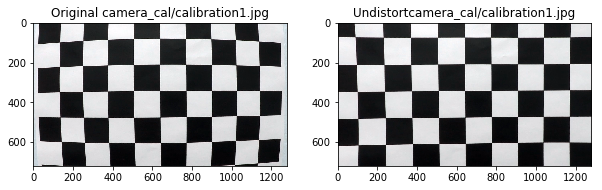

In [30]:
# Check how camera was calibrated.

def test_calibration(images_folder, mtx, dist):
    images = glob.glob(images_folder+ "*.jpg")
    
    for file in images:
        image = cv2.imread(file)
        
        dst = cv2.undistort(image, mtx, dist, None, mtx)
        f, (p1, p2) = plt.subplots(1,2, figsize=(10,5))
        p1.set_title("Original " + file)
        p1.imshow(image)
        
        p2.set_title("Undistort" + file)
        p2.imshow(dst)
        plt.show()
        break
        

    
test_calibration("camera_cal/", mtx, dist)